# Analyzing Manhattan Property Sales 


---


Team 5: Carmen Cheung, Haiyuan Zhang, Peixuan Liu, Jiazhi Jia, Yu Shu






## Background
Manhattan, NY is a very attractive city to live in due to career opportunities, culture, entertainment, and more. It is also one of the most expensive cities in the U.S. to buy property. According to Rocket Mortgage, Manhattan ranks second behind San Francisco, CA and has the highest median price per square foot of real estate in the United States in 2021 at 1,400 dollars per square foot while the national median is 123 dollars per square foot. In such a pricey real estate market, it is crucial for prospective buyers and sellers to understand the housing market and trends in Manhattan to make informed decisions. 

## Objective
Our goal is to identify trends of Manhattan real estate using property sales data from 2017 - 2021. We will analyze relationships between variables over the years to identify what type of properties are most demanded in Manhattan and understand housing market trends. We can also build a machine learning model to predict sales value in the future. The analysis and insight gained from this project can identify major trends to help buyers and sellers navigate a volatile market.


## Dataset Information


---




### Data Profile 
Categorical Variables:
*   Borough
*   Neighborhood
*   Building Class Category 
*   Tax Class at Present 
*   Building class at Present 
*   Block 
*   Lot 
*   Address
*   Zip Code 
*   Apartment Number 

Numeric Variables:
*   Residential Unit 
*   Commercial Unit 
*   Total Unit 
*   Land Square Feet 
*   Gross Square Feet
*   Sale Price 
*   Year Built

Date Variables:
*   Sale Date 



### Data Source
NYC Department of Finance 
https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page 

### Data Cleaning
The following steps were taken to clean the datasets:

1.   Combined yearly sales data from 2017 to 2020 and rolling sales data from 2020-2021 and renamed columns to concatanate data on column name.
2.   Created a unique identifier for each property using Borough, Block, Lot called “BBL”.
3.   Dropped columns because of missing values or redundant and duplicate data.
4.   Converted data to appropriate data type. 















In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Mounted at /content/drive


In [ ]:
# Import data to Collab
house_2017 = pd.read_excel('/content/drive/MyDrive/Team Project/2017_manhattan.xlsx')
house_2018 = pd.read_excel('/content/drive/MyDrive/Team Project/2018_manhattan.xlsx')
house_2019 = pd.read_excel('/content/drive/MyDrive/Team Project/2019_manhattan.xlsx')
house_2020 = pd.read_excel('/content/drive/MyDrive/Team Project/2020_manhattan.xlsx')
house_2021 = pd.read_excel('/content/drive/MyDrive/Team Project/rollingsales_manhattan2021.xlsx')

In [ ]:
# Set column names to standardize name for combining datasets
house_2017.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2018.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2019.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2020.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2021.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]

In [ ]:
# Join 2017-2021 sales data tables
house = pd.concat([house_2017, house_2018, house_2019, house_2020, house_2021], ignore_index=True, keys=['2017', '2018', '2019', '2020', '2021'])

In [ ]:
# Create a "BBL" column as a unique property ID using "Borough", "Block", "Lot"
house['BBL'] = house['BOROUGH'].astype(str) + house['BLOCK'].astype(str) + house['LOT'].astype(str)
house["BBL"] = house["BBL"].str.replace(".", "")

In [ ]:
# Take a look at the Manhattan property sales data 
house.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS,BLOCK,LOT,EASEMENT,BUILDING CLASS,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BBL
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,10009,11.0,0.0,11.0,1750.0,6500.0,1900.0,2,C4,3750000,2017-04-03,137528
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,10009,24.0,1.0,25.0,2650.0,9960.0,1910.0,2,C7,5235000,2017-07-11,138536
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,10009,5.0,0.0,5.0,2139.0,4416.0,1900.0,2,C2,0,2017-06-16,13925


In [ ]:
# Check all missing values
house.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS                           199
BLOCK                                 0
LOT                                   0
EASEMENT                          65792
BUILDING CLASS                      199
ADDRESS                               0
APARTMENT NUMBER                  35057
ZIP CODE                              0
RESIDENTIAL UNITS                 21939
COMMERCIAL UNITS                  29582
TOTAL UNITS                       21403
LAND SQUARE FEET                  30118
GROSS SQUARE FEET                 30118
YEAR BUILT                         5511
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
BBL                                   0
dtype: int64

In [ ]:
# Drop the 'EASEMENT' and "APARTMENT NUMBER" column because many missing values
# Drop the "TAX CLASS" and "BUILDING CLASS" column because redundant 
# Drop the duplicated values (overlap in data between 2020 sales dataset and rolling sales 2020-2021 dataset)
house.drop(axis=1,columns=['EASEMENT', 'APARTMENT NUMBER', 'TAX CLASS', 'BUILDING CLASS'], inplace=True)
house.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
#Renamed "TAX CLASS AT TIME OF SALE" and "BUILDING CLASS AT TIME OF SALE" to shorten 
house.rename(columns={'TAX CLASS AT TIME OF SALE': 'TAX CLASS', 'BUILDING CLASS AT TIME OF SALE': 'BUILDING CLASS'}, inplace=True)

In [ ]:
# Convert float to integer
house['RESIDENTIAL UNITS']=house['RESIDENTIAL UNITS'].fillna(-1)
house['COMMERCIAL UNITS']=house['COMMERCIAL UNITS'].fillna(-1)
house['TOTAL UNITS']=house['TOTAL UNITS'].fillna(-1)
house['LAND SQUARE FEET']=house['LAND SQUARE FEET'].fillna(-1)
house['GROSS SQUARE FEET']=house['GROSS SQUARE FEET'].fillna(-1)
house['YEAR BUILT']=house['YEAR BUILT'].fillna(-1)
house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']]=house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']].astype('Int64')
house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']]=house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']].replace(-1, np.nan)

In [ ]:
house.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81779 entries, 0 to 81778
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  81779 non-null  int64         
 1   NEIGHBORHOOD             81779 non-null  object        
 2   BUILDING CLASS CATEGORY  81779 non-null  object        
 3   BLOCK                    81779 non-null  int64         
 4   LOT                      81779 non-null  int64         
 5   ADDRESS                  81779 non-null  object        
 6   ZIP CODE                 81779 non-null  int64         
 7   RESIDENTIAL UNITS        61702 non-null  Int64         
 8   COMMERCIAL UNITS         54059 non-null  Int64         
 9   TOTAL UNITS              62238 non-null  Int64         
 10  LAND SQUARE FEET         53523 non-null  Int64         
 11  GROSS SQUARE FEET        53523 non-null  Int64         
 12  YEAR BUILT               76308 n

In [ ]:
# Fill the missing values
house['RESIDENTIAL UNITS'].fillna((house['RESIDENTIAL UNITS'].median().astype(int)), inplace=True)
house['COMMERCIAL UNITS'].fillna((house['COMMERCIAL UNITS'].median().astype(int)), inplace=True)
house['TOTAL UNITS'].fillna((house['TOTAL UNITS'].median().astype(int)), inplace=True)
house['LAND SQUARE FEET'].fillna((house['LAND SQUARE FEET'].loc[house['LAND SQUARE FEET'] != 0]).median(), inplace=True)
house['LAND SQUARE FEET'].replace(0,(house['LAND SQUARE FEET'].loc[house['LAND SQUARE FEET'] != 0]).median(),inplace=True)
house['GROSS SQUARE FEET'].fillna((house['GROSS SQUARE FEET'].loc[house['GROSS SQUARE FEET'] != 0]).median(), inplace=True)
house['GROSS SQUARE FEET'].replace(0,(house['GROSS SQUARE FEET'].loc[house['GROSS SQUARE FEET'] != 0]).median(),inplace=True)
house['YEAR BUILT'].fillna(0, inplace=True)

In [ ]:
house.to_csv(r"\content\drive\house_clean.csv")

In [ ]:
# Check missing data again, there is no missing data now 
house.isnull().sum()

BOROUGH                    0
NEIGHBORHOOD               0
BUILDING CLASS CATEGORY    0
BLOCK                      0
LOT                        0
ADDRESS                    0
ZIP CODE                   0
RESIDENTIAL UNITS          0
COMMERCIAL UNITS           0
TOTAL UNITS                0
LAND SQUARE FEET           0
GROSS SQUARE FEET          0
YEAR BUILT                 0
TAX CLASS                  0
BUILDING CLASS             0
SALE PRICE                 0
SALE DATE                  0
BBL                        0
dtype: int64

## Exploratory Phase

### Year by Year Trends 
*   Average sales price declining since 2019 but median price stays consistent.
*   More properties are being sold than transferred proportionally in 2021 compared to previous years 
*    Monthly sales trends shows summer is most popular time to buy which decreases in the winter. Median price per square foot is higher in summer months too.
*   Pandemic drastically decreased number of properties sold in mid-2020 but has bounced back to higher than before in late 2020 to present 





In [ ]:
sns.set_palette('Set2')
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [ ]:
# Extract the year and the month from the 'SALE DATE' column
house['SALE DATE'] = pd.to_datetime(house['SALE DATE'], format = '%Y/%m/%d')
house['SALE YEAR'] = house['SALE DATE'].dt.year
house['SALE MONTH'] = house['SALE DATE'].dt.month

In [ ]:
#Establishing a threshold to identify monetary sales vs. 
#House sold at very low price would be identified as transform rather than sell.
identify=house['SALE PRICE'].sort_values()
p=identify.quantile(q=0.235)
p

180000.0

In [ ]:
# Distinguish between sold properties and transferred properties
sales = house[house['SALE PRICE']>180000]
trans = house[~(house['SALE PRICE']>180000)]

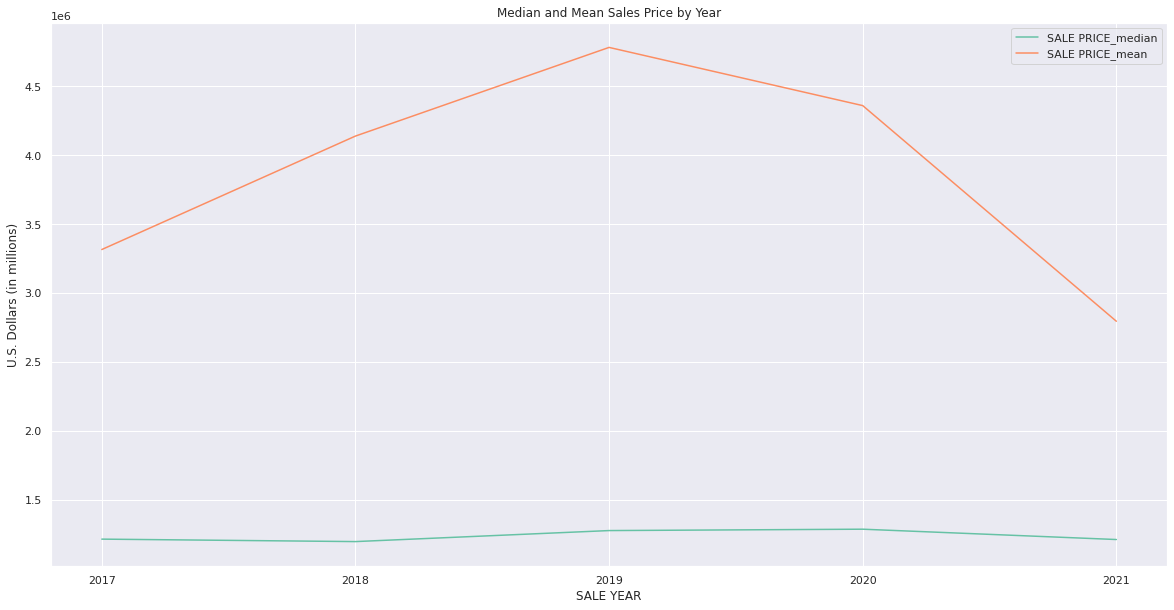

In [ ]:
# Median and mean sales price by year
median_sales=sales.groupby('SALE YEAR')['SALE PRICE'].median().reset_index()
mean_sales=sales.groupby('SALE YEAR')['SALE PRICE'].mean().reset_index()
m = median_sales.merge(mean_sales, on='SALE YEAR', suffixes=('_median','_mean'))
m.plot(x='SALE YEAR', y=['SALE PRICE_median', 'SALE PRICE_mean'], kind='line')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Median and Mean Sales Price by Year')
plt.ylabel('U.S. Dollars (in millions)');

In [ ]:
# Count total sold units and total transfered units by year
sales_y = sales.groupby('SALE YEAR')['BBL'].count().reset_index()
trans_y = trans.groupby('SALE YEAR')['BBL'].count().reset_index()
y = sales_y.merge(trans_y, on='SALE YEAR', suffixes=('_sales', '_trans'))

In [ ]:
# Sales units and transferred units by year
y.plot(x='SALE YEAR', y=['BBL_sales', 'BBL_trans'], kind='bar', color=('lightsteelblue', 'plum'))
plt.xlabel('Year')
plt.ylabel('Units Sold Count')
plt.title('Sales and Transferred Units by Year');

In [ ]:
# Using tax class to identify whether units are residential or commercial
house_x=house
house_x['type of use']=0
for rows in range(len(house_x)):
  if (house_x['TAX CLASS'][rows]==4)|(house_x['TAX CLASS'][rows]==3)|(house_x['TAX CLASS'][rows]=='4')|(house_x['TAX CLASS'][rows]=='3'):
      house_x['type of use'][rows]='C'
  else:
      house_x['type of use'][rows]='R'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Residential units and commercial units by year
sns.countplot(x="SALE YEAR", data=house_x, hue='type of use', palette=["mediumaquamarine", "coral"])
plt.title('Residential and Commercial Units by Year');

In [ ]:
# Calculating the average price per square foot by year and comparing it with properties built trends
price = sales.groupby('SALE YEAR')['SALE PRICE'].sum().reset_index()
land = sales.groupby('SALE YEAR')['LAND SQUARE FEET'].sum().reset_index()
avg = price.merge(land, on='SALE YEAR')
avg['PRICE PER SQFT'] = avg['SALE PRICE']/avg['LAND SQUARE FEET']
year_built = house[house['YEAR BUILT']>2010].groupby('YEAR BUILT')['BBL'].count().reset_index()
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.barplot(x='SALE YEAR', y='PRICE PER SQFT', data=avg, ax=axs[0])
sns.lineplot(x='YEAR BUILT', y='BBL', data=year_built, ax=axs[1])
sns.set_palette('Set2')
axs[0].set_ylabel('Average Price per SQFT')
axs[1].set_ylabel('Total Units Count')
axs[0].title.set_text('Average Price per Square Foot by Year')
axs[1].title.set_text('Properties Built by Year')

In [ ]:
#Units count by Month to Median Price Per Square Foot
sns.set_style(style='dark')
fig, ax = plt.subplots(nrows=2, figsize=(20, 15))
ax[0].set_ylabel('Median Price per Square Foot')
ax[1].set_ylabel('Units Count')
ax[0].title.set_text('Median Price per Square Foot by Month')
ax[1].title.set_text('Units Sold by Month')
house['PRICE PER SQFT'] = (house['SALE PRICE']/house['LAND SQUARE FEET'])
house.groupby('SALE MONTH')['PRICE PER SQFT'].median().plot(kind = 'bar', ax = ax[0], color = 'mediumaquamarine')
sales.groupby('SALE MONTH')['BBL'].count().plot(kind='line', color = 'coral', ax = ax[1]);

In [ ]:
# Total units count by each month in the recent 5 years
house.groupby('SALE YEAR')['SALE MONTH'].value_counts().unstack().plot(kind='bar', figsize=(22,5), cmap='summer')
plt.xlabel('Year')
plt.ylabel('Units Count')
plt.title('Total Units Sold in Each Month by Year');

In [ ]:
# Total units count in each neighborhood trends by year
neighborhood_y = house.groupby(['NEIGHBORHOOD', 'SALE YEAR'])['BBL'].count().sort_values(ascending=False).reset_index()
sns.lineplot(data=neighborhood_y, x='SALE YEAR', y='BBL', hue='NEIGHBORHOOD', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Total Units Count')
plt.title('Total Units and Neighborhood by Year');

**Insights**

Generally, the house market is the most popular in summer (May-August). However, due to the pandemic, sales dropped significantly in the summer of 2020 but has since recovered. The housing market in Manhattan has been flourishing since with more sales than any of the other years starting in late 2020 to present. 

The popularity of the Upper East Side, Upper West Side, and Midtown East have declined in recent years.

There is a huge difference between the mean sales prices and the median sales prices by year. It could be due to the outliners (extremely high house prices).

The mean price per square foot is the lowest in 2018. It could be the oversupply of the apartments as there were a large amount of new properties built in 2017.

### Building Types of Manhattan

*   Majority of properties sold are in tax class 2 - residential aparments and condos.
*   There is a bigger range in price in commercial properties than residential properties 
*   Most popular building types have building codes R (residential condos in small buildings), D (apartments with elevator in building ), and C (multiple family homes)
*   Trend of increasing size of properties (measure by land square feet) by the year they are built  






In [ ]:
#create table called 'building' that just contains select columns 
building = pd.read_csv('/content/drive/MyDrive/Team Project/house.csv')
building.drop(axis=1,columns=['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'LOT', 'BUILDING CLASS CATEGORY', 'BLOCK', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET'], inplace=True)
building = building[['BBL', 'TAX CLASS', 'BUILDING CLASS', 'LAND SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE']]
building['PRICE/SQUARE FEET'] = building['SALE PRICE']/building['LAND SQUARE FEET']

In [ ]:
building.head()

In [ ]:
#number of properties sold in each tax class 
#tax class 1 & 2 = residential, tax class 3 & 4 = commercial 
building.groupby('TAX CLASS')['BBL'].count()

In [ ]:
#pie chart of tax class distribution (tax class 1 = residential properties up to three units, tax class 2 = residential units like condos or apartments, tax class 4 = commercial buildings)
data= list(house.groupby('TAX CLASS')['BBL'].count())
fig = plt.figure(figsize =(10, 7))
labels=['Tax Class 1','Tax Class 2', 'Tax Class 4']
plt.pie(data,labels=labels, explode = [0,0,0.2], shadow=True,autopct="%0.2f%%",labeldistance=0.8,textprops={'fontsize':15,'color':'black'},colors=['coral','lightsteelblue', 'plum'])
plt.legend()
plt.title('Distribution of Property Tax Class', fontsize = 18);

In [ ]:
# Plot of sale price boxplot distribution by tax class of building
taxplot = sns.boxplot(x='TAX CLASS', y = np.log(house['SALE PRICE']), data = house[(house['SALE PRICE'] > 180000)], hue = 'TAX CLASS', order=[1,2,4], palette=('lightsteelblue', 'plum', 'coral')).set(
    title='Log Sale Price by Tax Class',
    xlabel='Tax Class',
    ylabel='Log Sale Price')
taxplot;

In [ ]:
#count of residential and non-residential/commerical properties 
residential_building = house[(house['TAX CLASS'] == 1)|(house['TAX CLASS'] == 2)]['BBL'].count()
commercial_building = house[(house['TAX CLASS'] == 4)]['BBL'].count()
print('Residential Count:', residential_building)
print('Commericla Count:', commercial_building)
print('Percent Residential', residential_building/(residential_building + commercial_building)*100,'%')
print('Percent Commercial', commercial_building/(residential_building + commercial_building)*100,'%')

In [ ]:
#size of buildings trend 
house.groupby(['SALE YEAR'])['LAND SQUARE FEET'].mean().plot(kind = 'line', color = 'coral').set(title = 'Average Size of Properties Sold', xlabel = 'Year', ylabel = 'Average Size (land square feet)', xticks = [2017,2018,2019,2020,2021])

In [ ]:
# Simplify building code 
# Number of properties in each building type sold 
building_code_add = building
building_code_add['BUILDING TYPE'] = building_code_add['BUILDING CLASS'].astype(str).str[0]
building_code_add = building_code_add[(building_code_add['BUILDING TYPE'] != '0')]
building_code = building_code_add.groupby('BUILDING TYPE')['BBL'].count()
building_type = building_code.to_frame(name = 'Count').reset_index().drop(index = 0)

In [ ]:
# Identify most popular building type (R (residential condos in small buildings), D (apartments with elevator in building ), C (multiple family homes), O (office buildings from 1-20 stories), S (Family Homes with Office/Store))
building_type.sort_values('Count',ascending = False).head(5)

In [ ]:
# Plot count of most popular building class
sns.countplot(x= 'BUILDING TYPE', data = building_code_add,order = ['S', 'O', 'C', 'D', 'R'])
plt.title('Total Units Count by Building Type')
plt.xlabel('Building Type')
plt.ylabel('# of Properties')

In [ ]:
#plot of top five most popular building types and the avg price per square feet
group2 = building.groupby('BUILDING TYPE')['PRICE/SQUARE FEET'].mean()
building_price = group2.to_frame(name= 'AVG PRICE/SQUARE FEET').reset_index()
sns.barplot(x= 'BUILDING TYPE', y = 'AVG PRICE/SQUARE FEET', data = building_price, order = ['S', 'O', 'C', 'D', 'R'])
plt.title('Avg Price/Square Foot of Most Popular Building Types')
plt.xlabel('Building Type')
plt.ylabel('Average Price/Square Foot')

In [ ]:
# Identify most popular building code (R4 - CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG., D4 - ELEVATOR COOPERATIVE, R9 -	CO-OP WITHIN A CONDOMINIUM, C6 - 	WALK-UP COOPERATIVE,R1 -	CONDO; RESIDENTIAL UNIT IN 2-10 UNIT BLDG.)
most_building_code = building.groupby(['BUILDING CLASS'])['BBL'].count().reset_index().sort_values('BBL', ascending = False)
print(most_building_code.head(5))

In [ ]:
# Average size of properties built trend by decade
decade_add = building
decade_add['DECADE'] = (building['YEAR BUILT'].astype(int)//10)*10
year_built_filter = decade_add[decade_add['DECADE'] >= 1700]
year_built = year_built_filter.groupby('DECADE')['LAND SQUARE FEET'].mean().astype(int).to_frame(name= 'LAND SQUARE FEET AVG').reset_index()
print(year_built)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'DECADE', y = 'LAND SQUARE FEET AVG', data = year_built)
plt.title('Average Size of Properties Built Trend by Decade')

**Insights**

There are more residential properties in Manhattan being sold than commercial with 93% of sales in the last five years being residential properties. The majority of these properties fall into tax class 2 which are usually condos or apartments and are generally less expensive with commerical buildings having the largest range in prices and a higher median price. 

Some of the most popular building types in Manhattan belong to the "R" building class category followed by "D" and "C" which are all residential, apartment variations which support our other findings. 

The size of properties are growing larger as they are built closer to present- the trend of average land square feet of properties to the decade that they were built in is generally increasing. 




### Neighborhoods of Manhanttan 
*   Most commerical neighborhoods are Chinatown and Fashion District. 
*   Majority of Manhattan neighborhoods developed past 1900s with exception of Chinatown, Midtown West, and Tribeca. 
*   Most expensive neighborhoods by price/square foot are Javitz Center and Midtown CBD neighborhoods.
*   Most popular locations to buy property are in the Upper East Side area.





In [ ]:
Neighborhood = pd.read_csv('/content/drive/MyDrive/Team Project/house.csv')
Neighborhood.drop(axis=1,columns=['Unnamed: 0', 'BOROUGH', 'LOT', 'BUILDING CLASS CATEGORY', 'BLOCK', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'BUILDING CLASS'], inplace=True)
Neighborhood = Neighborhood[['BBL', 'TAX CLASS','NEIGHBORHOOD','SALE DATE', 'LAND SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]

In [ ]:
Neighborhood['Commercial/Residential']=0
for i in range(len(Neighborhood)):
  if ((Neighborhood['TAX CLASS'][i] == 1) | (Neighborhood['TAX CLASS'][i] == 2)):
    Neighborhood['Commercial/Residential'] [i] = "Residential"
  else:
    Neighborhood['Commercial/Residential'] [i] = "Commercial"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Distribution of neighborhood properties in the past 5 years
Neighborhood.groupby("NEIGHBORHOOD")["BBL"].count()

NEIGHBORHOOD
ALPHABET CITY                 735
CHELSEA                      3486
CHINATOWN                     568
CIVIC CENTER                 1198
CLINTON                      1446
EAST VILLAGE                  914
FASHION                       701
FINANCIAL                    1821
FLATIRON                     1659
GRAMERCY                     2434
GREENWICH VILLAGE-CENTRAL    2848
GREENWICH VILLAGE-WEST       2814
HARLEM-CENTRAL               3501
HARLEM-EAST                   996
HARLEM-UPPER                  622
HARLEM-WEST                   183
INWOOD                        544
JAVITS CENTER                 431
KIPS BAY                     1606
LITTLE ITALY                  291
LOWER EAST SIDE              1992
MANHATTAN VALLEY             1129
MIDTOWN CBD                  1022
MIDTOWN EAST                 5308
MIDTOWN WEST                 4015
MORNINGSIDE HEIGHTS           356
MURRAY HILL                  2863
ROOSEVELT ISLAND              184
SOHO                         1750
S

In [ ]:
# The top five neighborhoods with the most properties sold 
Neighborhood_group = Neighborhood.groupby("NEIGHBORHOOD")

most_NEIGHBORHOOD = Neighborhood_group['NEIGHBORHOOD'].count().nlargest(5, keep = 'first').to_frame(name= 'COUNT').reset_index()
most_NEIGHBORHOOD

,NEIGHBORHOOD,COUNT
0,UPPER EAST SIDE (59-79),8248
1,UPPER EAST SIDE (79-96),7363
2,UPPER WEST SIDE (59-79),7247
3,MIDTOWN EAST,5308
4,UPPER WEST SIDE (79-96),4320


In [ ]:
# Distribution of commercial to residential properties in neighborhoods over the past 5 years
Neighborhood.pivot_table(values='BBL', index='NEIGHBORHOOD', columns='Commercial/Residential', aggfunc='count')

Commercial/Residential,Commercial,Residential
NEIGHBORHOOD,,
ALPHABET CITY,29.0,706.0
CHELSEA,196.0,3290.0
CHINATOWN,199.0,369.0
CIVIC CENTER,117.0,1081.0
CLINTON,102.0,1344.0
EAST VILLAGE,37.0,877.0
FASHION,304.0,397.0
FINANCIAL,168.0,1653.0
FLATIRON,155.0,1504.0


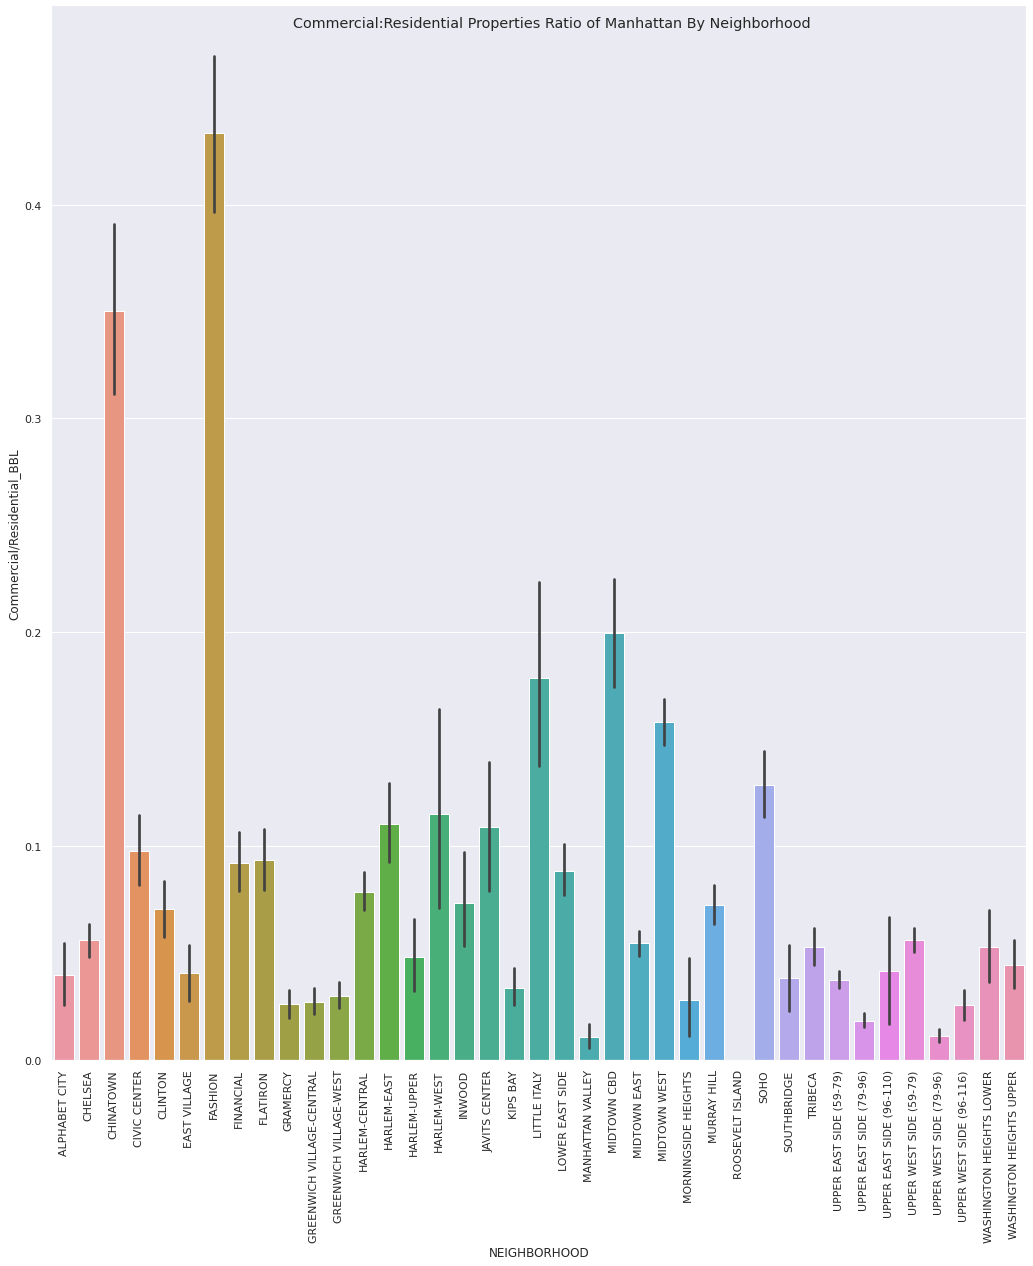

In [ ]:
# Majority Commercial BBLs are in Chinatown and Fashion neighborhood.
#This graph shows the commerical to residential buildings ratio which means a higher ratio means more commercial buildings in the area
Neighborhood['Commercial/Residential_BBL'] = Neighborhood['Commercial/Residential'].replace("Residential", 0).replace("Commercial", 1)
sns.set(rc={'figure.figsize':(90,10)})
ax = sns.catplot(data=Neighborhood, x='NEIGHBORHOOD', y='Commercial/Residential_BBL', height=15.5, kind='bar')
plt.xticks(rotation = 90)
ax.fig.suptitle('Commercial:Residential Properties Ratio of Manhattan By Neighborhood')
plt.show();

In [ ]:
#Distinguish between monetary sales and ownership transfer
Neighborhood['BBL_sales'] = Neighborhood[Neighborhood['SALE PRICE'] >= 180000]["BBL"] 
Neighborhood['BBL_trans'] = Neighborhood[Neighborhood['SALE PRICE'] < 180000]["BBL"]

In [ ]:
# Total sold BBls are 62564 properties.
# 19215 properties includes transfers i.e. $0 or nonsensical low number.
print('Monetary Sales:', Neighborhood['BBL_sales'].count())
print('Non-monetary Sales(Transfers):', Neighborhood['BBL_trans'].count())#Donated and discounted properties

Monetary Sales: 62564
Non-monetary Sales(Transfers): 19215


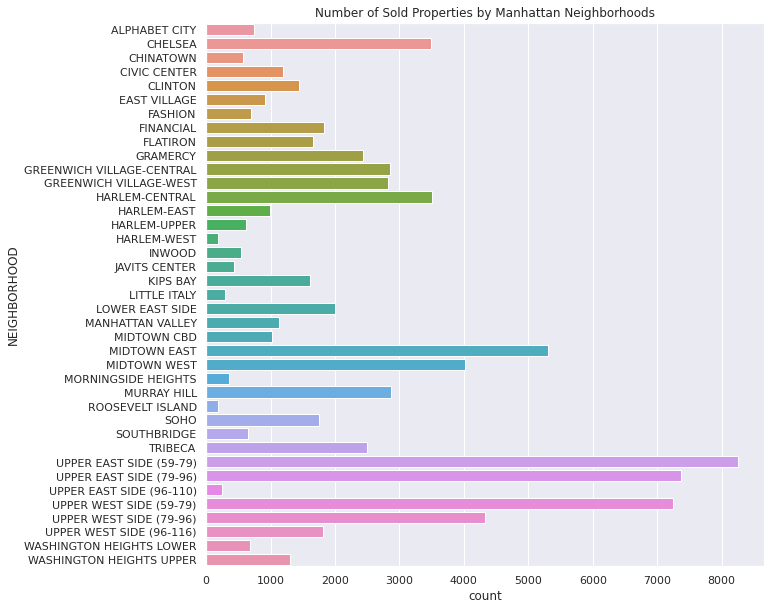

In [ ]:
# Sold properties of each Manhattan neighborhoods
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y = Neighborhood["NEIGHBORHOOD"], data = Neighborhood['BBL_sales']).set(title='Number of Sold Properties by Manhattan Neighborhoods')
plt.show()

In [ ]:
# Properties on the Upper East Side (59-79) have been the most popular sales neighborhood in the last 5 years.
# These are the top five neighborhoods that have sold a lot of properties.
Neighborhood_code = Neighborhood.groupby('NEIGHBORHOOD')['BBL_sales'].count()
Neighborhood_type = Neighborhood_code.to_frame(name = 'Count').reset_index().drop(index = 0)
Neighborhood_type.sort_values('Count',ascending = False).head(5)

,NEIGHBORHOOD,Count
31,UPPER EAST SIDE (59-79),6328
32,UPPER EAST SIDE (79-96),5990
34,UPPER WEST SIDE (59-79),5406
23,MIDTOWN EAST,4209
35,UPPER WEST SIDE (79-96),3313


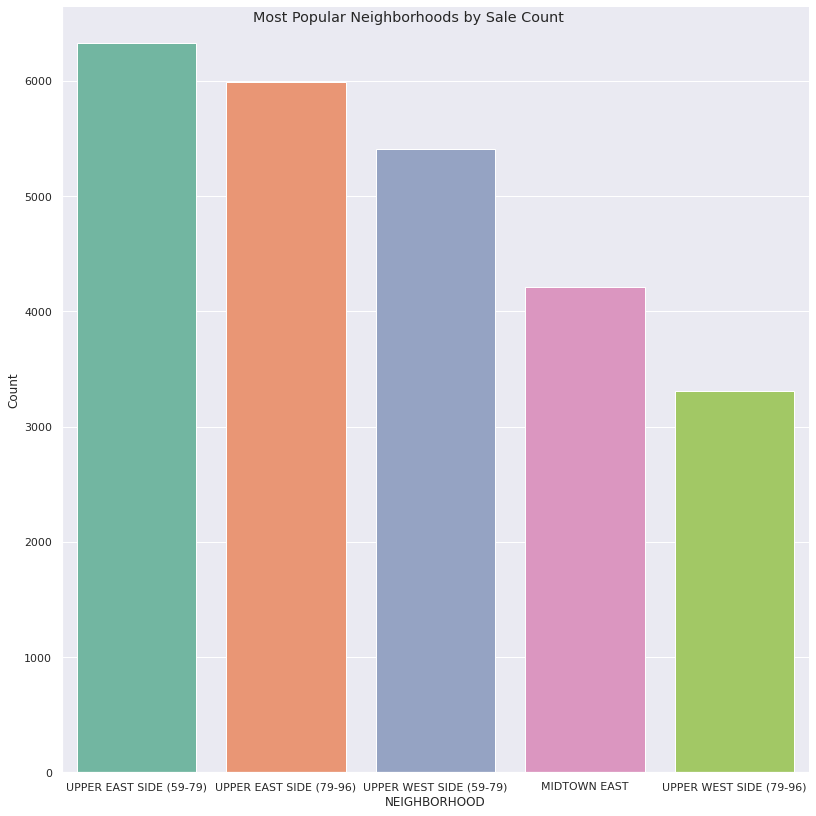

In [ ]:
#Top five neighborhoods that have sold a lot of properties
sns.set_palette('Set2')
bx = sns.catplot(data=Neighborhood_type, x='NEIGHBORHOOD', y='Count', height=11.5, kind='bar', order = ['UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)', 'UPPER WEST SIDE (59-79)', 'MIDTOWN EAST', 'UPPER WEST SIDE (79-96)'])
bx.fig.suptitle('Most Popular Neighborhoods by Sale Count')
plt.show();

In [ ]:
# Properties on the HARLEM-WEST have been the least popular in the last 5 years.
# These are the top five neighborhoods that have sold the fewest properties.
Neighborhood_type.sort_values('Count',ascending = True).head(5)

,NEIGHBORHOOD,Count
15,HARLEM-WEST,119
27,ROOSEVELT ISLAND,142
33,UPPER EAST SIDE (96-110),188
19,LITTLE ITALY,207
25,MORNINGSIDE HEIGHTS,312


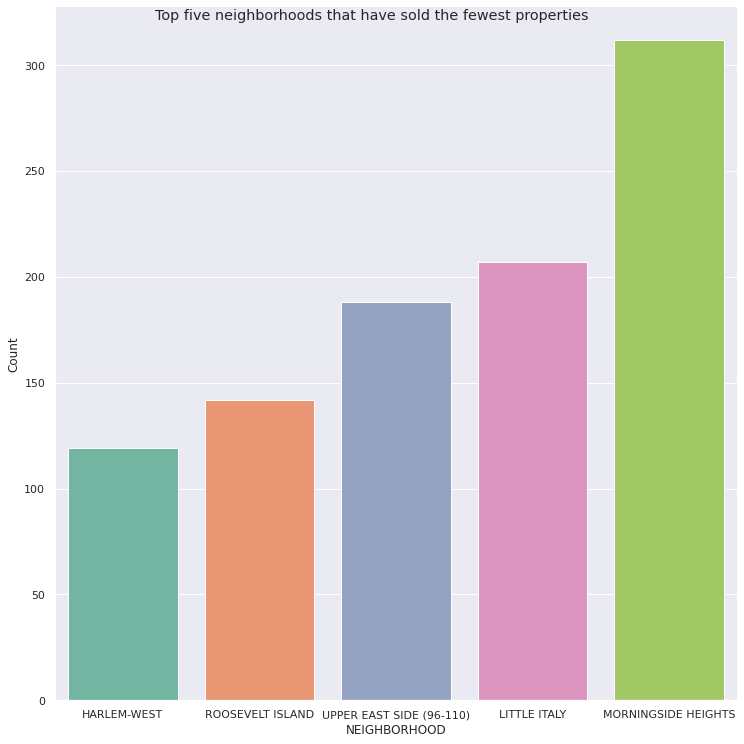

In [ ]:
cx = sns.catplot(data=Neighborhood_type, x='NEIGHBORHOOD', y='Count', height=10.5, kind='bar', order = ['HARLEM-WEST', 'ROOSEVELT ISLAND', 'UPPER EAST SIDE (96-110)', 'LITTLE ITALY', 'MORNINGSIDE HEIGHTS'])
cx.fig.suptitle('Top five neighborhoods that have sold the fewest properties')
sns.set_palette('Set2')
plt.show();

In [ ]:
# Count average sale price per foot by neighborhood.
price = Neighborhood.groupby('NEIGHBORHOOD')['SALE PRICE'].sum().reset_index()
land = Neighborhood.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].sum().reset_index()
Neighborhood_avg = price.merge(land, on='NEIGHBORHOOD')
Neighborhood_avg['PRICE PER SQFT'] = Neighborhood_avg['SALE PRICE']/Neighborhood_avg['LAND SQUARE FEET']
Neighborhood_avg = Neighborhood_avg[(Neighborhood_avg['LAND SQUARE FEET'] != 0)]

In [ ]:
# This is the neighborhood with the top five highest average prices.
Neighborhood_avg.sort_values('PRICE PER SQFT',ascending = False).head(5)

,NEIGHBORHOOD,SALE PRICE,LAND SQUARE FEET,PRICE PER SQFT
17,JAVITS CENTER,4839962324,1509745,3205.814442
22,MIDTOWN CBD,15561962826,5326085,2921.838992
7,FINANCIAL,14109344460,6040361,2335.844573
6,FASHION,8871215662,3920109,2263.002295
10,GREENWICH VILLAGE-CENTRAL,12613535715,8933521,1411.933292


In [ ]:
xx=most_NEIGHBORHOOD['NEIGHBORHOOD']
xx.values.tolist()
rs=Neighborhood_avg[Neighborhood_avg['NEIGHBORHOOD']=='JAVITS CENTER']
for i in xx:
  a=Neighborhood_avg[Neighborhood_avg['NEIGHBORHOOD']==i]
  rs.append(a)


['UPPER EAST SIDE (59-79)',
 'UPPER EAST SIDE (79-96)',
 'UPPER WEST SIDE (59-79)',
 'MIDTOWN EAST',
 'UPPER WEST SIDE (79-96)']

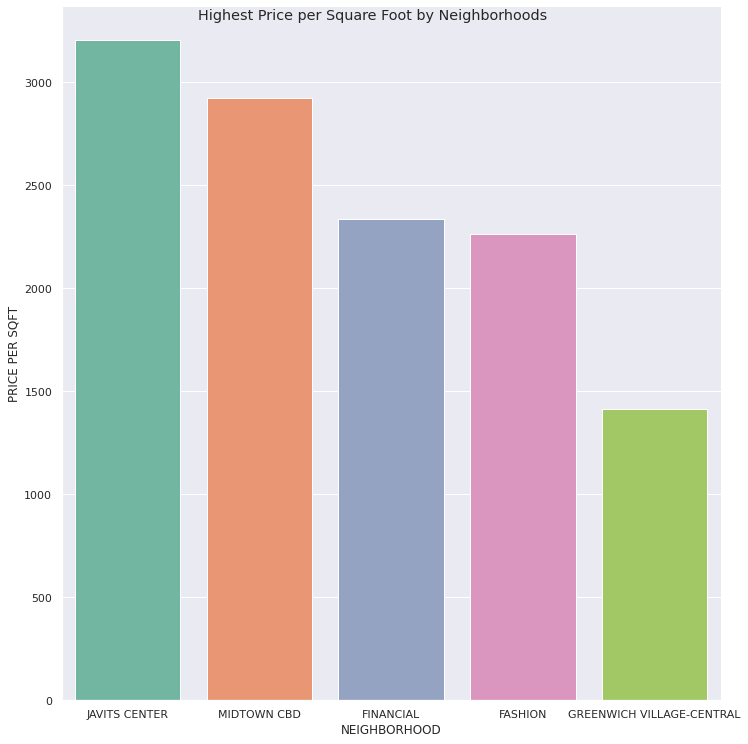

In [ ]:
dx = sns.catplot(data=Neighborhood_avg, x='NEIGHBORHOOD', y='PRICE PER SQFT', height=10.5, kind='bar', order = ['JAVITS CENTER', 'MIDTOWN CBD', 'FINANCIAL', 'FASHION', 'GREENWICH VILLAGE-CENTRAL'])
dx.fig.suptitle('Highest Price per Square Foot by Neighborhoods')
sns.set_palette('Set2')
plt.show();

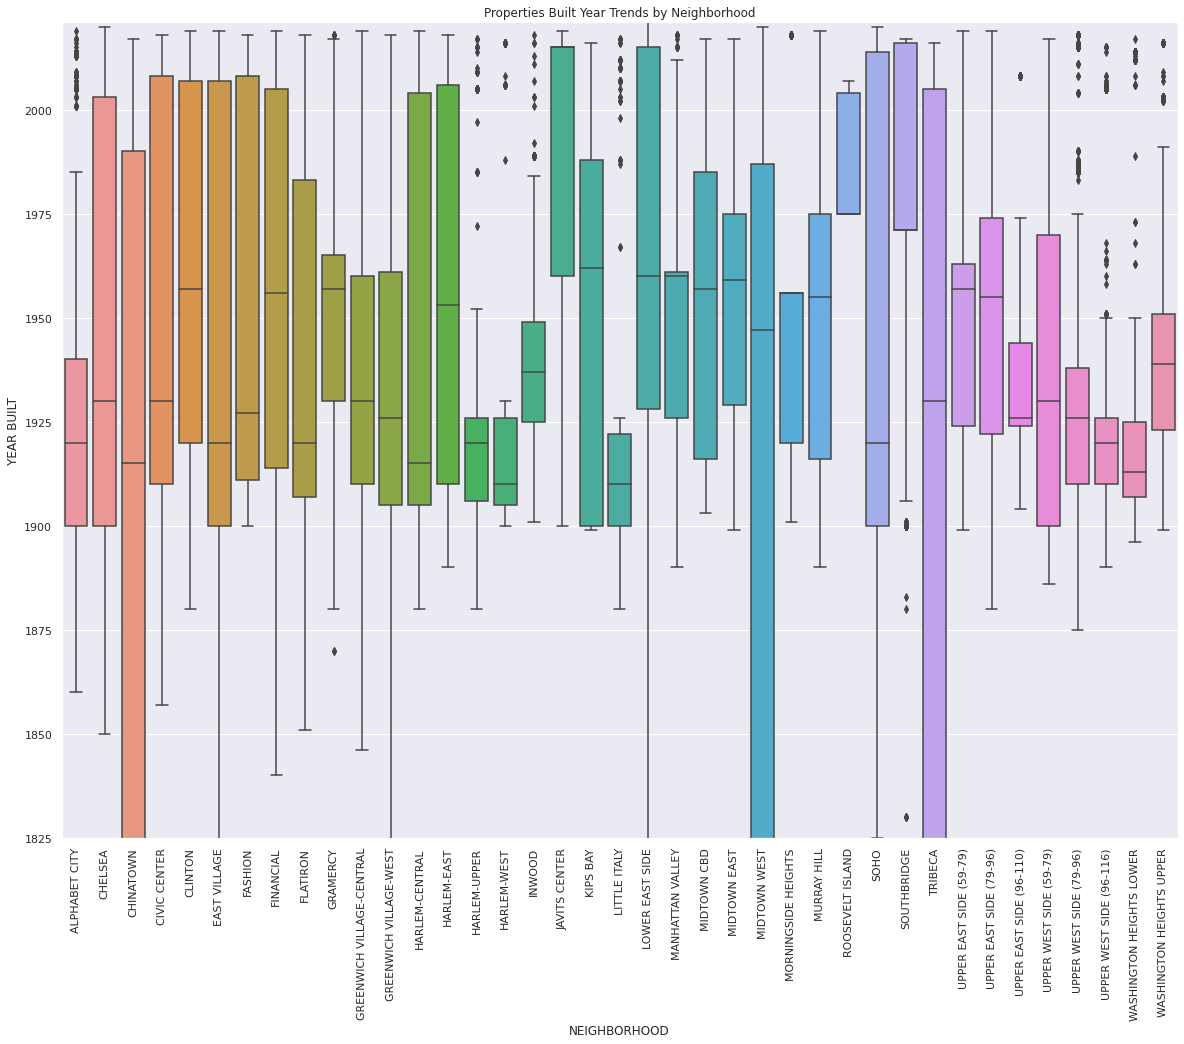

In [ ]:
# Year built boxplot versus neighborhood - indicates the development of neighborhoods with the majority developed past the 1900s
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x='NEIGHBORHOOD', y="YEAR BUILT", data=house)
fig.axis(ymin=1825, ymax=2021);
plt.xticks(rotation=90)
plt.title('Properties Built Year Trends by Neighborhood');

**Insights**

Majority of neighborhood properties sold are residential units, Chinatown and the Fashion neighborhood have the most commercial properties.

Properties on the Upper East Side(59-79) have been the most popular in the last 5 years, properties on the Harlem-west have been the least popular.

The Javits Center (3,205 dollars per square foot) and Midtown CBD (2,922 dollars per square foot) neighborhoods have the highest prices per square foot.

Most neighborhoods were developed after the 1900s with the majority of the properties being built after 1900. Chinatown, Midtown West, and Tribeca were the only three that were more developed in the 19th-century. 


### Commerical vs. Residential Properties
*   93% Residential and 7% Commericial Properties
*   Commerical properties are consistenly more expensive than residential properties on average by price per square foot
*  Average size of commercial properties increasing by year while residential properties consistent except in 2018 
*   Rebound in 2000s of commercial properties built and increasing properties built in Manhattan 




In [ ]:
# Using tax class to identify whether they are residential or commercial. 
house_x=house
house_x['type of use']=0
for rows in range(len(house_x)):
  if (house_x['TAX CLASS'][rows]==4)|(house_x['TAX CLASS'][rows]==3)|(house_x['TAX CLASS'][rows]=='4')|(house_x['TAX CLASS'][rows]=='3'):
      house_x['type of use'][rows]='C'
  else:
      house_x['type of use'][rows]='R'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# House sold at very low price would be identified as transform rather than sell.
x1=house_x['SALE PRICE']
x1=house_x['SALE PRICE'].sort_values()
p=x1.quantile(q=0.235)
p

180000.0

In [ ]:
# Some of them are too expensive, we want to focus on the majority.
house3=house_x[house_x['SALE PRICE']>10000000]
price=house3['SALE PRICE']
len(price)

3073

In [ ]:
house3['avg_price']=house3['SALE PRICE']/house3['LAND SQUARE FEET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of Commercial/Residential Buildings')

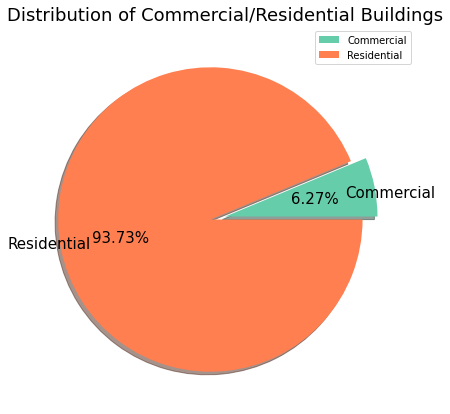

In [ ]:
# Pie chart of split betweeen commercial properties and residential properties amongst sold units 
house1=house_x
data=list(house1.groupby('type of use')['BOROUGH'].count())
fig = plt.figure(figsize =(10, 7))
labels=['Commercial','Residential']
plt.pie(data,labels=labels,explode=[0,0.1], shadow=True,autopct="%0.2f%%",labeldistance=0.8,textprops={'fontsize':15,'color':'black'},colors=["mediumaquamarine", "coral"])
plt.legend()
plt.title('Distribution of Commercial/Residential Buildings', fontsize = 18)

In [ ]:
house1['avg_price']=house1['SALE PRICE']/house1['LAND SQUARE FEET']
house1.groupby('YEAR BUILT').size()/house1.shape[0]

YEAR BUILT
0       0.124115
1111    0.000037
1798    0.000024
1800    0.000122
1821    0.000012
          ...   
2017    0.014099
2018    0.008303
2019    0.001663
2020    0.001602
2021    0.000024
Length: 164, dtype: float64

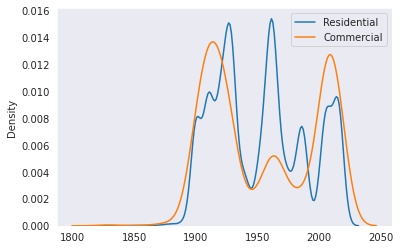

In [ ]:
# sns.kdeplot(data=house,x='YEAR BUILT')to see the time distribution of when the majority of residential and commercial units built by density 
house2=house_x[house_x['YEAR BUILT']>1800]

year_built1=list(house2.loc[house2['type of use']=='R','YEAR BUILT'])
year_built2=list(house2.loc[house2['type of use']=='C','YEAR BUILT'])
sns.kdeplot(year_built1,label='Residential')
sns.kdeplot(year_built2,label='Commercial')
plt.legend()

<function matplotlib.pyplot.show>

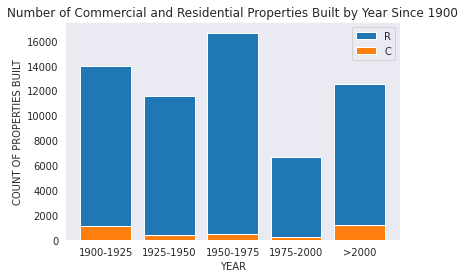

In [ ]:
# Residential houses:classify by year built
yoc1=house_x[(house_x['YEAR BUILT']>1900)&(house_x['YEAR BUILT']<1925)&(house_x['type of use']=='R')]['YEAR BUILT'].count()
yoc2=house_x[(house_x['YEAR BUILT']>1925)&(house_x['YEAR BUILT']<1950)&(house_x['type of use']=='R')]['YEAR BUILT'].count()
yoc3=house_x[(house_x['YEAR BUILT']>1950)&(house_x['YEAR BUILT']<1975)&(house_x['type of use']=='R')]['YEAR BUILT'].count()
yoc4=house_x[(house_x['YEAR BUILT']>1975)&(house_x['YEAR BUILT']<2000)&(house_x['type of use']=='R')]['YEAR BUILT'].count()
yoc5=house_x[(house_x['YEAR BUILT']>2000)&(house_x['type of use']=='R')]['YEAR BUILT'].count()
ls_yoc=[yoc1,yoc2,yoc3,yoc4,yoc5]
# Commercial houses houses:classify by year built
yoc7=house_x[(house_x['YEAR BUILT']>1900)&(house_x['YEAR BUILT']<1925)&(house_x['type of use']=='C')]['YEAR BUILT'].count()
yoc8=house_x[(house_x['YEAR BUILT']>1925)&(house_x['YEAR BUILT']<1950)&(house_x['type of use']=='C')]['YEAR BUILT'].count()
yoc9=house_x[(house_x['YEAR BUILT']>1950)&(house_x['YEAR BUILT']<1975)&(house_x['type of use']=='C')]['YEAR BUILT'].count()
yoc10=house_x[(house_x['YEAR BUILT']>1975)&(house_x['YEAR BUILT']<2000)&(house_x['type of use']=='C')]['YEAR BUILT'].count()
yoc11=house_x[(house_x['YEAR BUILT']>2000)&(house_x['type of use']=='C')]['YEAR BUILT'].count()
y=['1900-1925','1925-1950','1950-1975','1975-2000','>2000']
ls_yoc2=[yoc7,yoc8,yoc9,yoc10,yoc11]
plt.xlabel('YEAR')
plt.ylabel('COUNT OF PROPERTIES BUILT')
plt.title('Number of Commercial and Residential Properties Built by Year Since 1900')
plt.bar(y,ls_yoc)
plt.bar(y,ls_yoc2)
label1=['R','C']
plt.legend(label1)
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[Text(0.5, 0, 'Sale Price (in ten millions)'),
 Text(0.5, 1.0, 'Density Plot of Sales Price')]

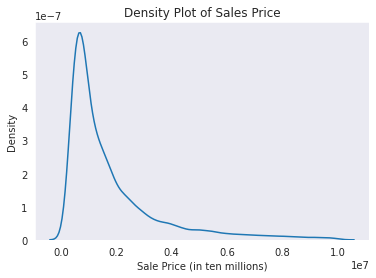

In [ ]:
# That's the data we want to focus on --> density of properties vs. sale price excluding outliers
house3=house_x
house3=house3[house3['SALE PRICE']<10000000]#outliers
house3=house3[house['SALE PRICE']>180000]#Take it as the threshold to filter out transform.
sns.kdeplot(house3['SALE PRICE']).set(title='Density Plot of Sales Price', xlabel = 'Sale Price (in ten millions)')

In [ ]:
# Group by year
house3['SALE DATE'] = pd.to_datetime(house3['SALE DATE'])
house3['SALE DATE']=house3['SALE DATE'].dt.year

In [ ]:
# Plot of the average price/square feet over the years of residential and commerical properties
sns.set_style('dark')
# Adjust to add subplots per catagory.
g = sns.catplot(x="SALE DATE", y="avg_price", 
                data=house3,hue='type of use', kind="bar", palette= ["mediumaquamarine", "coral"])
sns.set_palette('Set2')
# Add title and axis labels
g.fig.suptitle("Avg Price/SQFT by Year", y=1.02)
g.set(xlabel="Year", 
       ylabel="Price")

# Show plot
plt.show()

[Text(0, 0.5, 'Average Size (land square feet)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Average Size of Residential vs. Commercial Properties')]

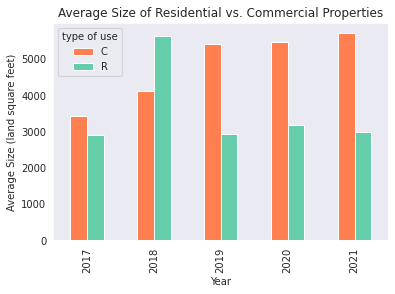

In [ ]:
# Average size of houses
house4=house3

# Omit outliers.
house4=house4[house4['avg_price']<30000] 
house4.groupby(['SALE DATE','type of use'])['LAND SQUARE FEET'].mean().unstack('type of use').plot(kind = 'bar', color = ("coral", "mediumaquamarine")).set(title = 'Average Size of Residential vs. Commercial Properties', xlabel = 'Year', ylabel = 'Average Size (land square feet)')


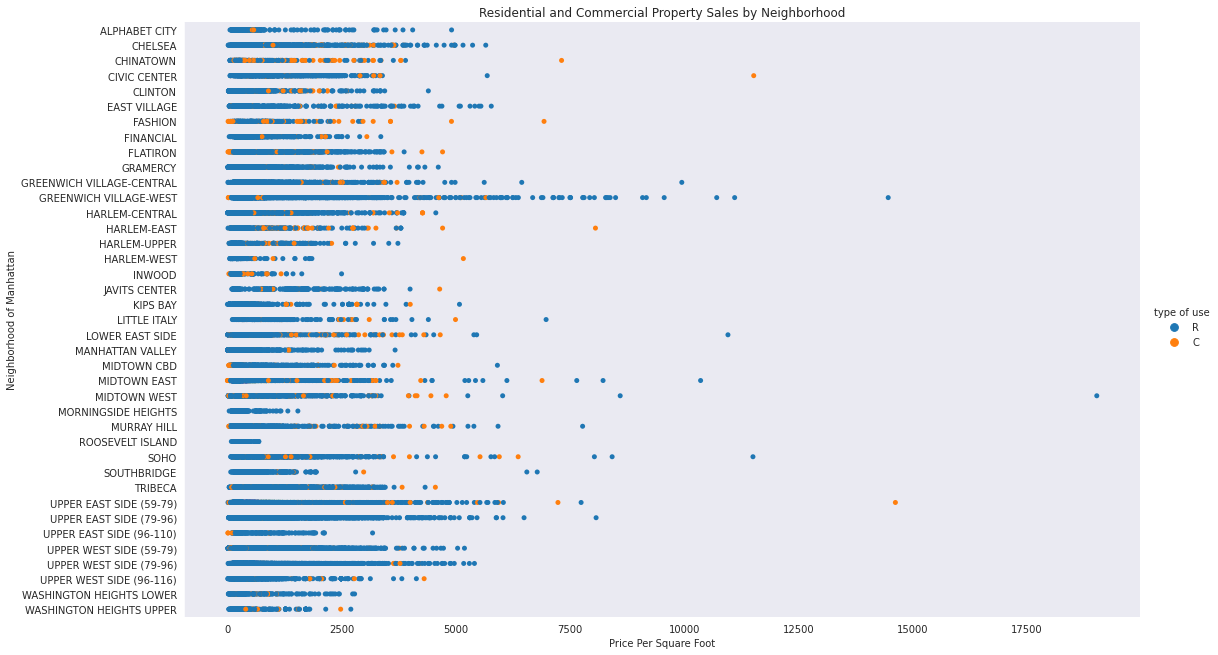

In [ ]:
kk = sns.catplot(x="avg_price",y="NEIGHBORHOOD", height=9,hue='type of use' , aspect=1.8,jitter=False,data=house4).set(title = 'Residential and Commercial Property Sales by Neighborhood', xlabel= 'Price Per Square Foot', ylabel = 'Neighborhood of Manhattan')

In [ ]:
house5=house_x
# The median price of them.
house5.groupby('SALE DATE')
print('Median Land Square Feet:', house5['LAND SQUARE FEET'].median())
print('Median Sale Price', house5['SALE PRICE'].median())

Median Land Square Feet: 2910.0
Median Sale Price 850000.0


**Insights**

Usually, houses for commercial use are more expensive than residential houses, whereas only few commercial houses were sold compared to the Residential houses in the last 5 years.

Most of the houses were sold for 200K-400K dollars, but there are actually 4 houses that were sold for even one billion dollar! A crazy price even in Manhattan.

Though there are some houses that are built 800 hundred years ago(I don't know if the data is wrong), most of houses in manhatann are built in 20th centry. During the 1940s-1980s there were only few commercial houses were built, maybe due to the 2nd world war or cold war.

There are some real expensive residential houses in Greenwick village and SOHO. There average price per sqrtfoot are even higher than commercial buildings in the same neighborhood.


### Sales vs. Transfer of Properties


*   Increase in properties sold to transferred ratio- proportionally more units are being sold versus transferred in ownership
*   More transfers than sales when land square feet < 1000 sq ft and similar above this threshold. 
*   Count of multi-family houses and commercial properties are about the same for sold and transferred and differ for properties in tax class 2 which is majority apartments. 







In [ ]:
#identify outlier in Sale Price
sns.boxplot(x=house['SALE PRICE'])

In [ ]:
# Remove outliers and split to sales and transfer dataset
transfers = house[(house['SALE PRICE'] < 180000)]
sales = house[(house['SALE PRICE'] >= 180000) & (house['SALE PRICE'] < 1500000000)]

In [ ]:
#create categorical column
sales['IF_SALE'] = 'YES'
transfers['IF_SALE'] = 'NO'

In [ ]:
#Merge sales and transfers dataset 
comb = pd.concat([sales, transfers], axis=0)

In [ ]:
#Count of Sales VS Transfers
data=list(comb.groupby('IF_SALE')['BOROUGH'].count())
fig = plt.figure(figsize =(10, 7))
labels=['Transfers','Sales']
plt.pie(data,labels=labels,explode=[0,0.1], shadow=True,autopct="%0.2f%%",labeldistance=0.8,textprops={'fontsize':20,'color':'black'},colors=['plum','lightsteelblue'])
plt.legend()
plt.title('Distribution of Monetary Sales/ Property Transfers', fontsize = 18)

In [ ]:
#Sales count based on Year Built analysis
sns.set(rc = {'figure.figsize':(20,10)})
sales['DECADE'] = (sales['YEAR BUILT'].astype(int)//10)*10
transfers['DECADE'] = (transfers['YEAR BUILT'].astype(int)//10)*10
comb2 = pd.concat([sales, transfers], axis=0)
sns.countplot(x = 'DECADE', data = comb2, hue = 'IF_SALE', palette=['plum', 'lightsteelblue'])
plt.title('Sales Count by Year Built')

In [ ]:
#Average size of property for sales and transfers
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='IF_SALE', y = 'LAND SQUARE FEET', data = comb[(comb['LAND SQUARE FEET'] <= 1000)], hue = 'IF_SALE', palette=['lightsteelblue', 'plum'])

In [ ]:
#Count of commercial house and residential house for sales and transfers based on tax class
sns.countplot(data=comb, x='TAX CLASS', hue='IF_SALE', order = [1,2,4])

**Insights**

We identified the sales trend for house sold and house transferred: house sold number went up after covid-19 in 2020 and house transferred number dropped dramatically after 2020. It shows people consider selling their house more after the pandemic

By analyzing the average size of the properties for both sales and transfers, we find that when land square feet are within 1000 range, more transfers happen when land square feet is small. But when land square feet above 1000 range, the distribution for both sales and transfers are similar.

We also count the commercial sales versus residential sales based on different tax classes for sales and transfers. And we find that residential sales more than commercial, while most sales landed on the Tax Class 2. Within residential sales, the count of sales is much more than transfers, but in commercial sales, the count of sales is about the same as count of transfers.


## Machine Learning


### **Random Forest**
The results of our random forest regression showed a R2 value of 0.3852 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

In [ ]:
#Loading dataset
house_ml = pd.read_csv('/content/drive/MyDrive/Team Project/house.csv')
house_ml.info()

In [ ]:
#Preprosessing - get rid of outliers 
sns.boxplot(x=house_ml['SALE PRICE'])

In [ ]:
sns.boxplot(x=house_ml['LAND SQUARE FEET'])

In [ ]:
sns.boxplot(x=house_ml['GROSS SQUARE FEET'])

In [ ]:
sns.boxplot(x=house_ml['YEAR BUILT'])

In [ ]:
sns.boxplot(x=house_ml['RESIDENTIAL UNITS'])

In [ ]:
sns.boxplot(x=house_ml['COMMERCIAL UNITS'])

In [ ]:
sns.boxplot(x=house_ml['TOTAL UNITS'])

In [ ]:
house_ml = house_ml[(house_ml['SALE PRICE']<=1500000000) & (house_ml['LAND SQUARE FEET'] <= 500000) 
& (house_ml['GROSS SQUARE FEET']<=2000000) & (house_ml['YEAR BUILT'] > 1800)  & (house_ml['RESIDENTIAL UNITS']<=1700) & (house_ml['COMMERCIAL UNITS'] < 300)
& (house_ml['TOTAL UNITS']<=1700)]

In [ ]:
house_ml.info()

In [ ]:
# Sales Price Histogram 
data = house_ml['SALE PRICE']
plt.hist(data, bins = np.arange(min(data), 8000000, 500000))

In [ ]:
# Extract SALE YEAR column from SALE DATE
house_ml['SALE YEAR'] = pd.DatetimeIndex(house_ml['SALE DATE']).year

In [ ]:
# Drop unrelated variables
house_ml.drop(['BOROUGH','BUILDING CLASS CATEGORY','ADDRESS','BBL','ZIP CODE','Unnamed: 0','LOT','BLOCK','SALE DATE'], axis=1, inplace=True)  

In [ ]:
# Correlation plot for four features with sale price
sns.set()
cols = ['RESIDENTIAL UNITS', 'LAND SQUARE FEET','YEAR BUILT','SALE YEAR','SALE PRICE']
sns.pairplot(house_ml[cols], height = 2);

In [ ]:
# Preprocessing - categorical variables
house_ml = pd.get_dummies(house_ml, columns=['NEIGHBORHOOD'])
house_ml = pd.get_dummies(house_ml, columns=['BUILDING CLASS'])

In [ ]:
# Create feature matrix and target vector. Our target variable is SALE PRICE
y = house_ml['SALE PRICE']
X = house_ml.drop(columns=['SALE PRICE'])

In [ ]:
# Split the data randomly into train and test with a 80-20 split (use random_state=2020)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2020)

In [ ]:
# Instantiate and fit a random forest model
model = RandomForestRegressor(random_state=2020)
model.fit(X_train,y_train)

In [ ]:
# Make predictions and find the overall accuracy 
y_pred = model.predict(X_test)

In [ ]:
# Print('RMSE RF:', np.sqrt(mean_squared_error(ytest, y_pred, squared=False)))
print('R2 RF:', metrics.r2_score(y_test,y_pred))

### **Linear Regression** 
The results of our linear regression using all variables in the cleaned machine learning dataset gave a RMSE of 13,111,362.92 which is quite high but considering that the standard deviation of the data is 17,013,560 the values we are dealing with in sales price are very high.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Heatmap of correlation to sales price
house_ml = pd.read_csv('/content/drive/MyDrive/Team Project/house.csv')
X_lr=house_ml.drop(['SALE PRICE'],axis='columns',inplace=False)
y_lr=house_ml['SALE PRICE']
#f, ax = plt.subplots(figsize=(15, 10))
#x['SALE PRICE']=y
#sns.heatmap(x.corr(),square=True,annot=True, cmap='summer')

In [ ]:
# Dummmies for the neighborhood category
house_ml=pd.get_dummies(house_ml)

In [ ]:
#X_lr=house_ml.drop('SALE PRICE', axis=1)
#y_lr=house_ml['SALE PRICE']

NameError: ignored

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_lr, y_lr, test_size=0.3, random_state=780)

In [ ]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_pred = lr.predict(Xtest)

In [ ]:
print('RMSE LR:',np.sqrt(mean_squared_error(ytest, y_pred)))

In [ ]:
house_ml['SALE PRICE'].describe()

In [ ]:
ax = plt.scatter(ytest, y_pred, edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Linear Regression')

## Conclusion

Our analysis showed evidence of the effect of the Covid-19 pandemic on the real estate market in our year to year trend analysis. The number of properties sold decreased significantly in mid-2020 but has rebounded to even higher counts by 2021 and still increasing. Further time analysis showed that the Manhattan real estate market is most active in the summer and sales dwindle towards the latter months. 

Our neighborhood analysis indicated that Chinatown or Fashion districts have more commercial properties than other neighborhoods to buy or sell while the most popular neighborhood for real estate is in the Upper East Side of Manhattan. However, the most expensive section of Manhattan to live in is the Javitz Center or Midtown CBD area which has the greatest price/square foot.

Generally, more residential units are sold than commercial units with apartments and condos being the most popular type of property. Properties built are getting larger with most of Manhattan's pieces of real estate being built later than 1900. Since Covid-19, more properties are being sold in monetary transcations rather in a transfer of ownership. 